In [185]:
from keras import models, layers
from keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
import cv2

# Mnist model

In [161]:
common_path = '/content/drive/MyDrive/University/Third course/Sixth term/Images/Resources/'

In [162]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [163]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [164]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [165]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [166]:
network = models.Sequential()

In [167]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [168]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2536 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1023 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0684 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0502 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0370 - accuracy: 0.9886


In [170]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9783


In [171]:
network.save('mnist_model.h5')

## Check with cv2

In [172]:
model = load_model('mnist_model.h5')

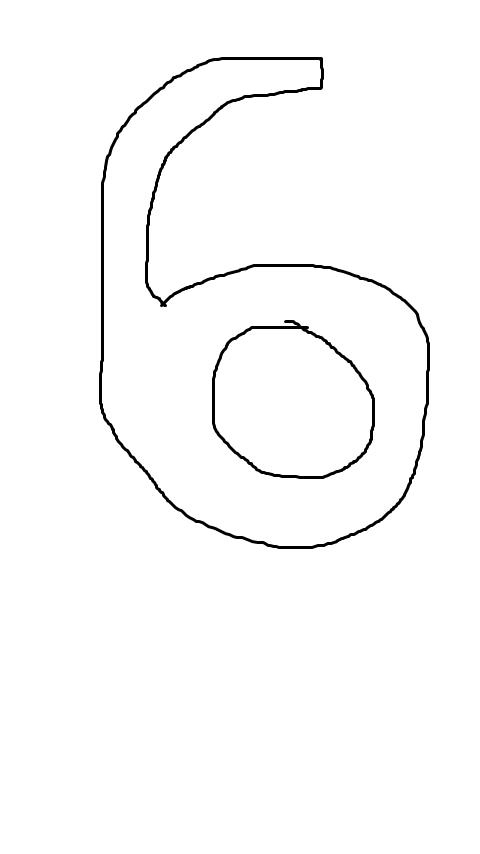

In [173]:
test_image = 255-cv2.imread(common_path + 'six.png', 0)

In [174]:
test_image = cv2.resize(test_image, (28, 28))
test_image = test_image.reshape((1, 28 * 28))
test_image = test_image.astype('float32') / 255

In [175]:
result = list(model.predict(test_image)[0])

In [176]:
print(result.index(max(result)))

6


# Cifar

In [186]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [187]:
train_images = train_images / 255
test_images = test_images / 255

In [188]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [189]:
network = models.Sequential()

In [190]:
network.add(layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

In [191]:
network.add(layers.MaxPool2D(pool_size=(2,2)))

In [192]:
network.add(layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

In [195]:
network.add(layers.Flatten())

In [196]:
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [197]:
network.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [200]:
network.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9436 - accuracy: 0.6698
Epoch 2/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8052 - accuracy: 0.7156
Epoch 3/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6844 - accuracy: 0.7615
Epoch 4/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.5574 - accuracy: 0.8036
Epoch 5/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4468 - accuracy: 0.8422
Epoch 6/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.3504 - accuracy: 0.8783
Epoch 7/20
1563/1563 [==============================] - 65s 42ms/step - loss: 0.2663 - accuracy: 0.9079
Epoch 8/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.2111 - accuracy: 0.9268
Epoch 9/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.1637 - accuracy: 0.9430
Epoch 10/20
1563/1563 [==============================] - 65s 41m

In [201]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 3.1914 - accuracy: 0.6277


In [202]:
network.save('cifar_model.h5')

## Test with CV2

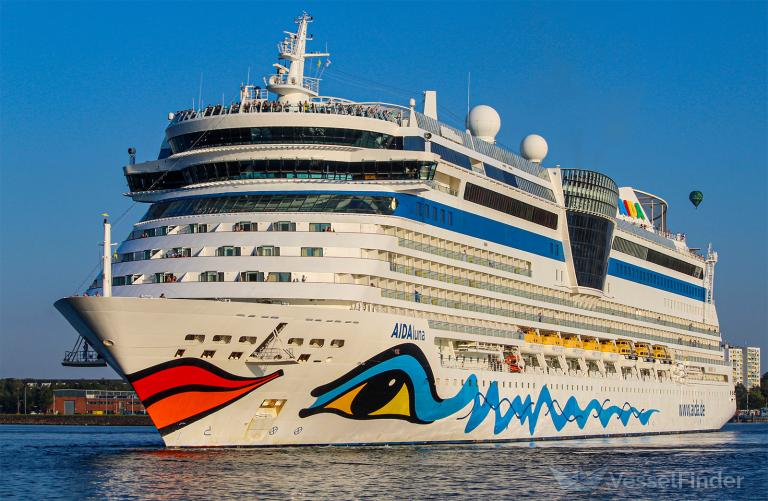


0.   airplane
1.   automobile
2.   bird
3.   cat
4.   deer
5.   dog
6.   frog
7.   horse
8.   ship
9.   truck


In [203]:
model = load_model('cifar_model.h5')

In [204]:
test_image = 255-cv2.imread(common_path + 'ship.jpg', 0)

In [205]:
test_image = cv2.resize(test_image, (96, 32))
test_image = test_image.reshape(1, 32, 32, 3)
test_image = test_image.astype('float32') / 255

In [206]:
result = list(model.predict(test_image)[0])

In [207]:
print(result.index(max(result)))

9


# Fashion

In [209]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [210]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [211]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [212]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [213]:
network = models.Sequential()

In [214]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [215]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [216]:
network.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.5601 - accuracy: 0.8020
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3811 - accuracy: 0.8595
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3367 - accuracy: 0.8760
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3102 - accuracy: 0.8866
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2910 - accuracy: 0.8923
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2750 - accuracy: 0.8974
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2629 - accuracy: 0.9026
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2536 - accuracy: 0.9071
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2431 - accuracy: 0.9115
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2343 - accuracy: 0.912

In [217]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8943


In [218]:
network.save('fashion_model.h5')

## Test with CV2

In [219]:
model = load_model('fashion_model.h5')

In [253]:
test_image = 255-cv2.imread(common_path + 'trousers.jpg', 0)

In [254]:
test_image = cv2.resize(test_image, (28, 28))
test_image = test_image.reshape((1, 28 * 28))
test_image = test_image.astype('float32') / 255

In [255]:
result = list(model.predict(test_image)[0])

In [256]:
print(result.index(max(result)))

1
